In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from faker import Faker
import time
import datetime
import random

In [70]:
df_prices = pd.read_csv('data/historical_stock_prices.csv')
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_companies = pd.read_csv('data/historical_stocks.csv')
list_of_companies = df_companies['ticker']

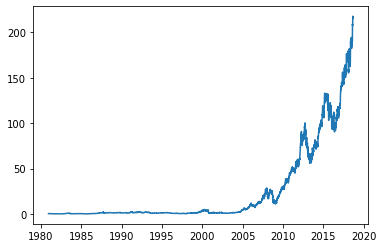

In [71]:
company_to_analyse = 'AAPL' # ticker
df_company = df_prices[df_prices['ticker'] == company_to_analyse]
plt.plot(df_company ['date'], df_company['close'])
# max_date = df_company['date'].max()
# min_date = df_company['date'].min()
# fake = Faker()
# investment_date = fake.date_between(start_date=min_date, end_date=max_date)

## Simulate Random Stock Market Investments

### Scenario 1:
- Investing from year X to year Y ('N' years) since a pre-defined 'Start_Investment_Year', 
- We invest a T amount of money in total, 
- either daily, monthly, or yearly
- the amounts of each investement are randomly distributed

In [72]:
# INPUTS
start_investment_year = 2012
end_investment_year = 2015
selling_day = '2018-02-02'
total_money_to_invest = 100000
investment_type = 'monthly'

In [73]:
start_investment_date = datetime.datetime.strptime('01/01/'+str(start_investment_year), "%d/%m/%Y")
end_investment_date = datetime.datetime.strptime('31/12/'+str(end_investment_year), "%d/%m/%Y")

In [74]:
if investment_type == 'monthly':
    pi = 12
elif investment_type == 'daily':
    pi = 365
elif investment_type == 'yearly':
    pi = 1
else:
    print("Warning: only options for monthly, daily and yearly investments have been configured")

number_of_individual_investments = (end_investment_year - start_investment_year)*pi
print(number_of_individual_investments)

36


How much will the monkey invest each time?

In [75]:
investment_quantities_list = np.random.dirichlet(np.ones(number_of_individual_investments))*total_money_to_invest
# 
investment_quantities_list

array([2765.00487478,  905.70050929, 2165.26990061, 3432.2437334 ,
        420.69224026, 4949.77907226, 2619.83312495,  293.35110413,
       1057.67373483, 5694.39259946, 3576.0958944 , 1986.64491821,
       3970.65775325,  225.97786903,  692.82688293, 1225.52921409,
       4441.95925733, 8464.18888156,  716.27955494, 4369.91131121,
        136.97302957, 2534.91961887, 5806.98788165,  957.68627989,
       1608.27105222,  166.54753407, 9554.64224917, 2026.18623272,
       3235.39995037, 1986.82779106,  775.942793  , 5024.20316636,
       5361.83544464, 1599.82527433, 1041.26690454, 4208.4723666 ])

When is the monkey going to invest this money?

In [76]:
investment_dates_list = []
fake = Faker()
for i in range(number_of_individual_investments):
    investment_date_temp = fake.date_between(start_date=start_investment_date, end_date=end_investment_date)
    investment_dates_list.append(investment_date_temp)
# 
investment_dates_list

[datetime.date(2015, 2, 13),
 datetime.date(2013, 6, 17),
 datetime.date(2015, 8, 2),
 datetime.date(2015, 5, 8),
 datetime.date(2012, 3, 17),
 datetime.date(2015, 7, 17),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 6, 15),
 datetime.date(2013, 3, 13),
 datetime.date(2012, 9, 9),
 datetime.date(2014, 12, 1),
 datetime.date(2014, 3, 8),
 datetime.date(2012, 10, 10),
 datetime.date(2015, 2, 23),
 datetime.date(2014, 7, 12),
 datetime.date(2015, 4, 24),
 datetime.date(2015, 5, 18),
 datetime.date(2013, 4, 28),
 datetime.date(2015, 2, 27),
 datetime.date(2015, 7, 25),
 datetime.date(2014, 1, 28),
 datetime.date(2012, 9, 19),
 datetime.date(2013, 7, 27),
 datetime.date(2012, 6, 30),
 datetime.date(2013, 10, 27),
 datetime.date(2012, 6, 1),
 datetime.date(2012, 11, 25),
 datetime.date(2015, 6, 18),
 datetime.date(2015, 12, 20),
 datetime.date(2012, 5, 16),
 datetime.date(2012, 12, 7),
 datetime.date(2013, 9, 13),
 datetime.date(2013, 8, 1),
 datetime.date(2012, 12, 18),
 datetime.date(

Which stocks is the monkey going to pick up?

Let's begin with removing stocks that didn't exists at the starting date or that were discontinued before the ending date

In [77]:
df_prices_temp = df_prices[(df_prices['date']>=start_investment_date) & (df_prices['date']<=end_investment_date)]

Some dates may not be avaible for trading - as holidays and weekends.
Pending on sorting this out.

In [78]:
number_of_business_days_period = np.busday_count(start_investment_date.date(),end_investment_date.date())
print(number_of_business_days_period)
number_of_data_points = df_prices_temp['ticker'].value_counts().max()
print(number_of_data_points)

1043
1006


Difference above it is probably attributed to holidays where Nasdaq closes: nine US stock market holidays - 5*9=36 days.

In [79]:
list_of_companies = df_prices_temp['ticker'].unique().tolist()

In [80]:
investment_companies_list = []
for i in range(number_of_individual_investments):
    company = random.choice(list_of_companies)
    investment_companies_list.append(company)
investment_companies_list

['SPTN',
 'ALG',
 'HLIT',
 'EMR',
 'ANCX',
 'DCOM',
 'COHR',
 'TX',
 'ENS',
 'VAC',
 'NUS',
 'FCPT',
 'VWOB',
 'DPLO',
 'RIGL',
 'FDTS',
 'VLT',
 'TBK',
 'PI',
 'GMLP',
 'MPX',
 'MAIN',
 'AVAL',
 'SLS',
 'EXP',
 'FRED',
 'SLVO',
 'PNK',
 'MGF',
 'MXL',
 'PDBC',
 'GNT',
 'CJJD',
 'OMAB',
 'DVA',
 'CBIO']

Create summary of the investment stragedy in a dataframe

In [81]:
df_investment_stragedy = pd.DataFrame(list(zip(investment_companies_list, investment_dates_list, investment_quantities_list)),
               columns =['Company', 'Investment_Date', 'Investment_Value'])

In [82]:
df_investment_stragedy = df_investment_stragedy.sort_values(by='Investment_Date')
df_investment_stragedy.reset_index(inplace=True, drop=True) 
df_investment_stragedy['Investment_Date'] = pd.to_datetime(df_investment_stragedy['Investment_Date'])
df_investment_stragedy

,Company,Investment_Date,Investment_Value
0,ANCX,2012-03-17,420.692240
1,MXL,2012-05-16,1986.827791
2,FRED,2012-06-01,166.547534
3,TX,2012-06-15,293.351104
4,SLS,2012-06-30,957.686280
5,VAC,2012-09-09,5694.392599
6,MAIN,2012-09-19,2534.919619
7,VWOB,2012-10-10,3970.657753
8,SLVO,2012-11-25,9554.642249
9,PDBC,2012-12-07,775.942793


In [ ]:
for i in range(len(df_investment_stragedy)):
    print(i)
    df_temp = df_investment_stragedy.iloc[i]
    # 
    try:
        value_at_purchase_date = df_prices[(df_prices['ticker'] == df_temp['Company']) &
                                        (df_prices['date'] == df_temp['Investment_Date'])]
        value_at_selling_date = df_prices[(df_prices['ticker'] == df_temp['Company']) &
                                        (df_prices['date'] == selling_day)]
        # 
        number_of_stocks = df_temp['Investment_Value']/value_at_purchase_date['open'].iloc[0]
        # 
        stock_buying_value = value_at_purchase_date['open'].iloc[0]
        stock_selling_value = value_at_selling_date['close'].iloc[0]
        percentage_change = (stock_selling_value - stock_buying_value)/stock_buying_value
        # 
        selling_value = number_of_stocks*stock_selling_value
        profit = selling_value - df_temp['Investment_Value']
        # 
        df_investment_stragedy.at[i,'selling_value'] = selling_value
        df_investment_stragedy.at[i,'number_of_stocks'] = number_of_stocks
        df_investment_stragedy.at[i,'stock_buying_value'] = stock_buying_value
        df_investment_stragedy.at[i,'stock_selling_value'] = stock_selling_value
        df_investment_stragedy.at[i,'percentage_change'] = percentage_change
        df_investment_stragedy.at[i,'net_profit'] = profit
    except Exception as e: 
        print(e)
        print('Some error occurred, needs to investigated')
        df_investment_stragedy.at[i,'percentage_change'] = ''
        df_investment_stragedy.at[i,'selling_value'] = ''
        df_investment_stragedy.at[i,'profit'] = ''


0
1
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
2
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
3
4
5
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
6
7
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
8
9
10
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
11
12
13
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
14
15
16
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
17
18
19
20
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
21
22
23
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
24
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
25
single positional indexer is out-of-bounds
Some error occurred, needs to

In [ ]:
df_investment_stragedy

,Company,Investment_Date,Investment_Value,percentage_change,selling_value,profit,number_of_stocks,stock_buying_value,stock_selling_value,net_profit
0,BCE,2012-04-13,2049.937532,0.132584,2321.727078,,51.184459,40.049999,45.360001,271.789546
1,OCSLL,2012-04-18,4402.499919,,,,NaN,NaN,NaN,NaN
2,WAT,2012-04-22,129.022411,,,,NaN,NaN,NaN,NaN
3,IDXX,2012-07-03,5078.659758,2.815725,19378.768072,,103.985662,48.840000,186.360001,14300.108314
4,XRX,2012-09-17,3274.122299,0.534985,5025.729588,,158.891234,20.606060,31.629999,1751.607289
5,LONE,2013-01-12,1351.488449,,,,NaN,NaN,NaN,NaN
6,RENX,2013-01-18,4513.797190,1.151193,9710.049601,,453.740644,9.947968,21.400000,5196.252411
7,AFSS,2013-01-20,1530.125304,,,,NaN,NaN,NaN,NaN
8,BANF,2013-03-27,8650.680573,1.630078,22751.967439,,411.056334,21.045000,55.349998,14101.286867
9,MTGE,2013-04-03,501.764561,-0.352242,325.02188,,19.232064,26.090000,16.900000,-176.742681


In [ ]:
df_investment_stragedy['net_profit'].sum()

29861.587270838238

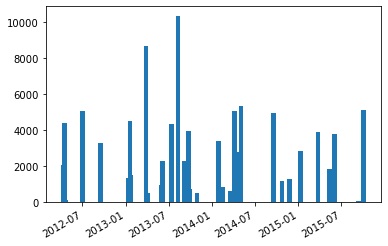

In [ ]:
fig, ax = plt.subplots()
ax.bar(df_investment_stragedy['Investment_Date'],df_investment_stragedy['Investment_Value'],width=20)
# ax.set_xticklabels(df_investment_stragedy['Company'])
fig.autofmt_xdate()

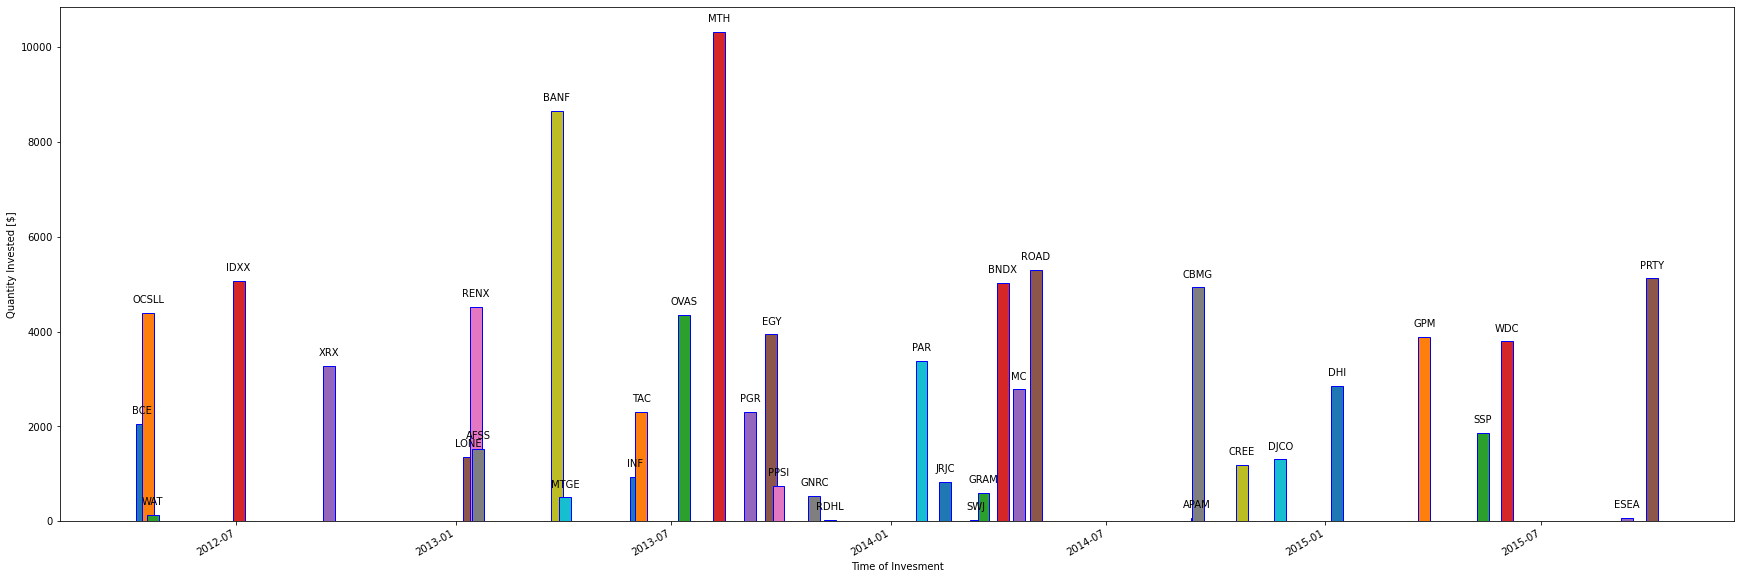

In [ ]:
fig, ax = plt.subplots()
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_investment_stragedy)) % cmap.N)
hbars = ax.bar(df_investment_stragedy['Investment_Date'],df_investment_stragedy['Investment_Value'],width=10, edgecolor='blue', color =  colors)
fig.autofmt_xdate()
ax.bar_label(hbars, labels=df_investment_stragedy['Company'], padding=8, color='k', fontsize=10)
ax.set_xlabel('Time of Invesment')
ax.set_ylabel('Quantity Invested [$]')
fig.set_size_inches(30, 10.5)
fig.savefig('invesment_stragedy.jpg', dpi=300)